In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

"safadaf"[-10:]

'safadaf'

In [2]:
def aggregate_predsV2(fold_predsFile):
    fold_preds = pd.read_csv(fold_predsFile+"/preds.csv")
    aggregate_pred = fold_preds['0']
    acc = [None] * 10
    mse = [None] * 10
    for i in range(0,10):
        acc[i] = accuracy_score(fold_preds[str(i)].round().astype("int"), y_true.age)
        mse[i] = mean_squared_error(fold_preds[str(i)], y_true.age)
        if i >= 1:
            aggregate_pred += fold_preds[str(i)]

    aggregate_pred = aggregate_pred/10.0    
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), y_true.age)
    mse_mean = mean_squared_error(aggregate_pred, y_true.age)
    print(fold_predsFile+ ":\t\t\t\t"+str(acc_mean) + " " + str(mse_mean))
    return acc, acc_mean, mse, mse_mean, aggregate_pred, fold_preds

def aggregate_predsV1(fold_predsFile):
    t = [None] * 10
    for i in range(0,10):
        t[i] = pd.read_csv(fold_predsFile+"/test_set_"+str(i)+".csv") 
    
    acc = [None] * 10
    mse = [None] * 10
    aggregate_pred = t[0].y_pred_test.values
    for i in range(0,10):
        acc[i] = accuracy_score(t[i].y_pred_test.values.round().astype("int"), t[0].y_true)
        mse[i] = mean_squared_error(t[i].y_pred_test.values, t[0].y_true)
        if i >= 1:
            aggregate_pred += t[i].y_pred_test.values

    aggregate_pred = aggregate_pred/10.0
    acc_mean = accuracy_score(aggregate_pred.round().astype("int"), t[0].y_true)
    mse_mean = mean_squared_error(aggregate_pred, t[0].y_true)
    print(fold_predsFile[-38:]+":\t\t"+str( acc_mean ) + " "+ str( mse_mean ) ) 
    return acc, acc_mean, mse, mse_mean, aggregate_pred, t
    
y_true = pd.read_csv("EFFNetV2_m_MLP_all/test_set_files.csv")

print("aggregate accuracy, mse")

lMinAcc, lMinAccMean, lMinMSE, lMinMSEMean, l_min, l_i = aggregate_predsV2( "EFFNetV2_l_min_mse" )
lMiddleAcc, lMiddleAccMean, lMiddleMSE, lMiddleMSEMean, l_middle, l_d = aggregate_predsV2( "EFFNetV2_l_middle_mse" )
lMaxAcc, lMaxAccMean, lMaxMSE, lMaxMSEMean, l_max, l_x = aggregate_predsV2( "EFFNetV2_l_max_mse" )
lAllAcc, lAllAccMean, lAllMSE, lAllMSEMean, l_all, l_a = aggregate_predsV2( "EFFNetV2_l_all_mse" )

mMinAcc, mMinAccMean, mMinMSE, mMinMSEMean, m_min, m_i = aggregate_predsV2( "EFFNetV2_m_min_mse" )
mMiddleAcc, mMiddleAccMean, mMiddleMSE, mMiddleMSEMean, m_middle, m_d = aggregate_predsV2( "EFFNetV2_m_middle_mse" )
mMaxAcc, mMaxAccMean, mMaxMSE, mMaxMSEMean, m_max, m_x = aggregate_predsV2( "EFFNetV2_m_max_mse" )
mAllAcc, mAllAccMean, mAllMSE, mAllMSEMean, m_all, m_a = aggregate_predsV2( "EFFNetV2_m_MLP_all" )

B4MinAcc, B4MinAccMean, B4MinMSE, B4MinMSEMean, b4_min, b4_i = aggregate_predsV1( "tf_EFFNetB4_groupkfold_stdScalar_10_test2" )
B4MiddleAcc, B4MiddleAccMean, B4MiddleMSE, B4MiddleMSEMean, b4_middle, b4_d = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_middle" )
B4MaxAcc, B4MaxAccMean, B4MaxMSE, B4MaxMSEMean, b4_max, b4_x = aggregate_predsV1( "EFFNetB4_groupkfold_stdScalar_max" )

B5MinAcc, B5MinAccMean, B5MinMSE, B5MinMSEMean, b5_min, b5_i = aggregate_predsV1( "tf_EFFNetB5_2_groupkfold_stdScalar_10_test_min" )
B5MiddleAcc, B5MiddleAccMean, B5MiddleMSE, B5MiddleMSEMean, b5_middle, b5_d = aggregate_predsV1( "tf_EFFNetB5_groupkfold_stdScalar_10_test_middle" )
B5MaxAcc, B5MaxAccMean, B5MaxMSE, B5MaxMSEMean, b5_max, b5_x = aggregate_predsV1( "tf_EFFNetB5_groupkfold_stdScalar_10_test_max" )

B6MinAcc, B6MinAccMean, B6MinMSE, B6MinMSEMean, b6_min, b6_i = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_min" )
B6MiddleAcc, B6MiddleAccMean, B6MiddleMSE, B6MiddleMSEMean, b6_middle, b6_i = aggregate_predsV1( "tf_EFFNetB6_groupkfold_stdScalar_10_test_middle" )
B6MaxAcc, B6MaxAccMean, B6MaxMSE, B6MaxMSEMean, b6_max, b6_x = aggregate_predsV1( "EFFNetB6_groupkfold_stdScalar_10_test_max" )

#all_cnns = l_all,l_middle,m_min,m_middle,m_max,m_all,b4_min,b4_middle,b4_max,b5_min,b6_middle,b6_min,b6_middle,b6_max
all_cnns = b4_min, b5_min, b6_min, m_min, l_min, b4_middle, b5_middle, b6_middle, m_middle, l_middle, b4_max, b5_max, b6_max, m_max, l_max, m_all, l_all
all_cnns2 = np.asarray([all_cnns])
all_acc = np.zeros((len(all_cnns),len(all_cnns)))
all_mse = np.zeros((len(all_cnns),len(all_cnns)))

aggregate accuracy, mse
EFFNetV2_l_min_mse:				0.7203883495145631 0.27984743881004925
EFFNetV2_l_middle_mse:				0.7281553398058253 0.2749396896282028
EFFNetV2_l_max_mse:				0.7242718446601941 0.28599091634838775
EFFNetV2_l_all_mse:				0.7223300970873786 0.27061980996288926
EFFNetV2_m_min_mse:				0.7398058252427184 0.2733061445705727
EFFNetV2_m_middle_mse:				0.7223300970873786 0.2753004481257845
EFFNetV2_m_max_mse:				0.7126213592233009 0.2891016447191845
EFFNetV2_m_MLP_all:				0.7398058252427184 0.2728000533332227
EFFNetB4_groupkfold_stdScalar_10_test2:		0.7281553398058253 0.27677442836796534
EFFNetB4_groupkfold_stdScalar_middle:		0.7145631067961165 0.2847701138075624
EFFNetB4_groupkfold_stdScalar_max:		0.7087378640776699 0.2908639084032022
tB5_2_groupkfold_stdScalar_10_test_min:		0.7436893203883496 0.2770159431240281
B5_groupkfold_stdScalar_10_test_middle:		0.7339805825242719 0.2731098431413754
NetB5_groupkfold_stdScalar_10_test_max:		0.7320388349514563 0.3587137165456544
NetB6_group

### Summary over all models

[0.7203883495145631, 0.7281553398058253, 0.7242718446601941, 0.7223300970873786, 0.7398058252427184, 0.7223300970873786, 0.7126213592233009, 0.7398058252427184, 0.7281553398058253, 0.7145631067961165, 0.7087378640776699, 0.7436893203883496, 0.7339805825242719, 0.7320388349514563, 0.7339805825242719, 0.7436893203883496, 0.7145631067961165]


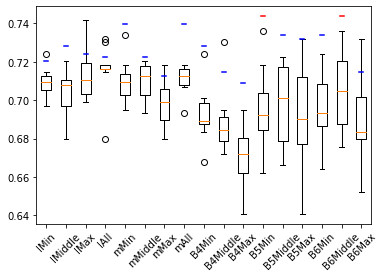

In [39]:
plt.boxplot([lMinAcc, lMiddleAcc, lMaxAcc, lAllAcc, 
             mMinAcc, mMiddleAcc, mMaxAcc, mAllAcc, 
             B4MinAcc, B4MiddleAcc, B4MaxAcc, 
             B5MinAcc, B5MiddleAcc, B5MaxAcc,
             B6MinAcc, B6MiddleAcc, B6MaxAcc])
print([lMinAccMean, lMiddleAccMean, lMaxAccMean, lAllAccMean, 
             mMinAccMean, mMiddleAccMean, mMaxAccMean, mAllAccMean, 
             B4MinAccMean, B4MiddleAccMean, B4MaxAccMean, 
             B5MinAccMean, B5MiddleAccMean, B5MaxAccMean,
             B6MinAccMean, B6MiddleAccMean, B6MaxAccMean])
plt.plot([0.9, 1.1], [lMinAccMean, lMinAccMean], 'b')
plt.plot([1.9, 2.1], [lMiddleAccMean, lMiddleAccMean], 'b')
plt.plot([2.9, 3.1], [lMaxAccMean, lMaxAccMean], 'b')
plt.plot([3.9, 4.1], [lAllAccMean, lAllAccMean], 'b')
plt.plot([4.9, 5.1], [mMinAccMean, mMinAccMean], 'b')
plt.plot([5.9, 6.1], [mMiddleAccMean, mMiddleAccMean], 'b')
plt.plot([6.9, 7.1], [mMaxAccMean, mMaxAccMean], 'b')
plt.plot([7.9, 8.1], [mAllAccMean, mAllAccMean], 'b')
plt.plot([8.9, 9.1], [B4MinAccMean, B4MinAccMean], 'b')
plt.plot([9.9, 10.1], [B4MiddleAccMean, B4MiddleAccMean], 'b')
plt.plot([10.9, 11.1], [B4MaxAccMean, B4MaxAccMean], 'b')
plt.plot([11.9, 12.1], [B5MinAccMean, B5MinAccMean], 'r')
plt.plot([12.9, 13.1], [B5MiddleAccMean, B5MiddleAccMean], 'b')
plt.plot([13.9, 14.1], [B5MaxAccMean, B5MaxAccMean], 'b')
plt.plot([14.9, 15.1], [B6MinAccMean, B6MinAccMean], 'b')
plt.plot([15.9, 16.1], [B6MiddleAccMean, B6MiddleAccMean], 'r')
plt.plot([16.9, 17.1], [B6MaxAccMean, B6MaxAccMean], 'b')
plt.xticks(range(1,18), ["lMin","lMiddle","lMax","lAll","mMin","mMiddle","mMax","mAll","B4Min","B4Middle","B4Max"
                         ,"B5Min","B5Middle","B5Max","B6Min","B6Middle","B6Max"], rotation = 45)

plt.show()

[0.27984743881004925, 0.2749396896282028, 0.28599091634838775, 0.27061980996288926, 0.2733061445705727, 0.2753004481257845, 0.2891016447191845, 0.2728000533332227, 0.27677442836796534, 0.2847701138075624, 0.2908639084032022, 0.2770159431240281, 0.2731098431413754, 0.3587137165456544, 0.272170267061415, 0.2622701387186297, 0.30471818752107327]


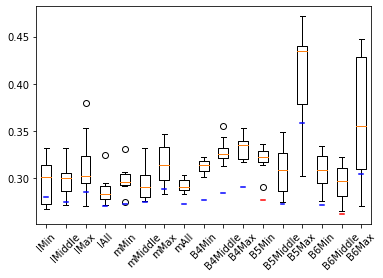

In [40]:
plt.boxplot([lMinMSE, lMiddleMSE, lMaxMSE, lAllMSE, 
             mMinMSE, mMiddleMSE, mMaxMSE, mAllMSE, 
             B4MinMSE, B4MiddleMSE, B4MaxMSE, 
             B5MinMSE, B5MiddleMSE, B5MaxMSE,
             B6MinMSE, B6MiddleMSE, B6MaxMSE])
print([lMinMSEMean, lMiddleMSEMean, lMaxMSEMean, lAllMSEMean, 
             mMinMSEMean, mMiddleMSEMean, mMaxMSEMean, mAllMSEMean, 
             B4MinMSEMean, B4MiddleMSEMean, B4MaxMSEMean, 
             B5MinMSEMean, B5MiddleMSEMean, B5MaxMSEMean,
             B6MinMSEMean, B6MiddleMSEMean, B6MaxMSEMean])
plt.plot([0.9, 1.1], [lMinMSEMean, lMinMSEMean], 'b')
plt.plot([1.9, 2.1], [lMiddleMSEMean, lMiddleMSEMean], 'b')
plt.plot([2.9, 3.1], [lMaxMSEMean, lMaxMSEMean], 'b')
plt.plot([3.9, 4.1], [lAllMSEMean, lAllMSEMean], 'b')
plt.plot([4.9, 5.1], [mMinMSEMean, mMinMSEMean], 'b')
plt.plot([5.9, 6.1], [mMiddleMSEMean, mMiddleMSEMean], 'b')
plt.plot([6.9, 7.1], [mMaxMSEMean, mMaxMSEMean], 'b')
plt.plot([7.9, 8.1], [mAllMSEMean, mAllMSEMean], 'b')
plt.plot([8.9, 9.1], [B4MinMSEMean, B4MinMSEMean], 'b')
plt.plot([9.9, 10.1], [B4MiddleMSEMean, B4MiddleMSEMean], 'b')
plt.plot([10.9, 11.1], [B4MaxMSEMean, B4MaxMSEMean], 'b')
plt.plot([11.9, 12.1], [B5MinMSEMean, B5MinMSEMean], 'r')
plt.plot([12.9, 13.1], [B5MiddleMSEMean, B5MiddleMSEMean], 'b')
plt.plot([13.9, 14.1], [B5MaxMSEMean, B5MaxMSEMean], 'b')
plt.plot([14.9, 15.1], [B6MinMSEMean, B6MinMSEMean], 'b')
plt.plot([15.9, 16.1], [B6MiddleMSEMean, B6MiddleMSEMean], 'r')
plt.plot([16.9, 17.1], [B6MaxMSEMean, B6MaxMSEMean], 'b')
plt.xticks(range(1,18), ["lMin","lMiddle","lMax","lAll","mMin","mMiddle","mMax","mAll","B4Min","B4Middle","B4Max"
                         ,"B5Min","B5Middle","B5Max","B6Min","B6Middle","B6Max"], rotation = 45)

plt.show()

### Ensemble of ensemble - MSE

In [3]:
from itertools import combinations

mseStr = ""
curr_models = np.asarray([])
for i in range(2, len(all_cnns)+1):
    curr_acc = np.asarray([])
    curr_acc_model = list()
    curr_mse = np.asarray([])
    curr_mse_model = list()
    comb = list(combinations(all_cnns, i))
    j_comb = list( combinations(range(len(all_cnns)), i) )
    for k in range(0, len(comb)):
        aggregate = sum(comb[k]) / i
        score = accuracy_score(aggregate.round().astype("int"), y_true.age)
        curr_acc = np.append(curr_acc, score )
        curr_acc_model.append( j_comb[k] )
        
        mse = mean_squared_error(aggregate, y_true.age)
        curr_mse = np.append(curr_mse, mse )
        curr_mse_model.append( j_comb[k] )
        
    best_model_idx = np.argmax(curr_acc)     
    abest_model = curr_acc_model[best_model_idx]
    abest_model = tuple(v+1 for v in abest_model)
    #print(str( len(comb) )+" "+str(curr_acc[best_model_idx])+ " "+str(abest_model))
    
    best_mse_idx = np.argmax(curr_mse)     
    abest_mse = curr_mse_model[best_mse_idx]
    abest_mse = tuple(v+1 for v in abest_mse)
    
    print(str( len(comb) )+" "+str(curr_mse[best_mse_idx])+ " "+str(abest_mse))
    #print(str( len(comb) )+" "+str(curr_acc[best_model_idx])+ " "+str(abest_model))
    
#print("**********")    
#print(mseStr)

136 0.31935643329693003 (12, 13)
680 0.2922812590902947 (12, 13, 15)
2380 0.27910534272682946 (12, 13, 14, 15)
6188 0.2723897592728141 (12, 13, 14, 15, 17)
12376 0.2690654461507171 (5, 10, 14, 15, 16, 17)
19448 0.2681994391314931 (5, 9, 10, 14, 15, 16, 17)
24310 0.26699865887186813 (4, 5, 9, 10, 14, 15, 16, 17)
24310 0.264285391128163 (4, 5, 9, 10, 12, 14, 15, 16, 17)
19448 0.2621039986500846 (4, 5, 9, 10, 12, 13, 14, 15, 16, 17)
12376 0.25863706174007023 (4, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17)
6188 0.25607546802703246 (4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17)
2380 0.2540622866092335 (4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17)
680 0.2523819517403853 (4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)
136 0.250956412776449 (2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)
17 0.24972575929434454 (1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)
1 0.248326030031801 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)


In [97]:
#!pip install shap
#import shap
#!pip install git+https://github.com/benedekrozemberczki/shapley #
#!pip install shapley

In [49]:
import shap
import sklearn
import functools #curried functions:

all_cnns3 = all_cnns2.T
masker = shap.maskers.Independent(data = all_cnns3)
explainer = shap.Explainer(functools.partial(np.average, axis=1), masker) #, X100)
#shap_values = explainer(all_cnns3)

sample_ind = 11
#shap.plots.waterfall(shap_values[sample_ind], max_display=14)
#shap.plots.bar(shap_values, max_display=14)

In [ ]:
```{toggle}

print(pr_age_group[0])
print(np.mean(pr_age_group[0]))
print(np.std(pr_age_group[0]))
print("DDDD")
print(np.percentile(pr_age_group[0], 25) )
print(np.percentile(pr_age_group[0], 50) )
print(np.percentile(pr_age_group[0], 75) )

q1 = np.percentile(pr_age_group[0], 25)
q3 = np.percentile(pr_age_group[0], 75)
print("DDDDDD")
print(len(pr_age_group[0]))
for j in range(len(pr_age_group[0])):
    if pr_age_group[0][j] < q1 or pr_age_group[0][j] > q3:
        print(pr_age_group[0][j])
        
```        

### Excluding min/max prediction by fold pr prediction

In [ ]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))

### Pascals triangle of ensemble

[[ 0  0  0]
 [ 4  0  0]
 [ 7  8  0]
 [10 11 12]]


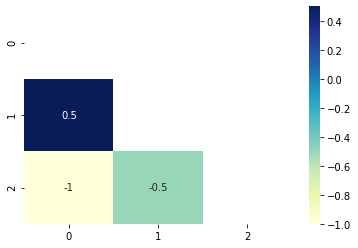

In [10]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
import numpy as np
 
# import file with data
data = np.asarray([[1,2,3], [3,3,1], [2,1,2]])
data = pd.DataFrame(data)
 
# creating mask
mask = np.triu(np.ones_like(data.corr()))
print(np.tril([[1,2,3],[4,5,6],[7,8,9],[10,11,12]], -1))
 
# plotting a triangle correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
mp.show()